In [1]:
%matplotlib inline

from collections import OrderedDict
from metaflow import Metaflow, Flow, get_metadata, namespace
import pandas as pd
import seaborn as sns

sns.set(font_scale=1.5, rc={'figure.figsize':(11.7,8.27)})

# Set namespace to None to search over all namespaces
namespace(None)

def run_to_dict(flow):
    d = OrderedDict()
    for attr in ('id', 'created_at', 'finished_at', 'successful', 'finished'):
        d[attr] = getattr(flow, attr)
    for tag in sorted(list(run.tags)):
        key, val = tag.split(':')
        d['tag_%s' % key] = val
    return d

In [2]:
print("Current metadata provider: %s" % get_metadata())

Current metadata provider: local@/home/jimmie/git/metaflow-tabular/metaflow_tabular


In [3]:
flows = list(Metaflow())
flows

[Flow('ForecastingFlow')]

In [4]:
# Set namespace to None to search over all namespaces
namespace(None)
for flow in Metaflow():
    run = flow.latest_run
    print(f"{flow.id}, last run: {run.finished_at}, successful: {run.successful}")

ForecastingFlow, last run: 2021-12-03 16:35:51.648000, successful: True


In [5]:
flow = Flow('ForecastingFlow')
runs =  list(flow.runs())
len(runs)

84

In [6]:
run_df = pd.DataFrame([run_to_dict(run) for run in runs])
run_df

,id,created_at,finished_at,successful,finished,tag_date,tag_metaflow_version,tag_python_version,tag_runtime,tag_user
0,1638570948153090,2021-12-03 16:35:48.153,2021-12-03 16:35:51.648,True,True,2021-12-03,2.4.3.post11+git421e9d9,3.8.12,dev,jimmie
1,1638570650894944,2021-12-03 16:30:50.895,2021-12-03 16:30:54.484,True,True,2021-12-03,2.4.3.post11+git421e9d9,3.8.12,dev,jimmie
2,1638570390140704,2021-12-03 16:26:30.141,NaT,False,False,2021-12-03,2.4.3.post11+git421e9d9,3.8.12,dev,jimmie
3,1638570210556672,2021-12-03 16:23:30.557,NaT,False,False,2021-12-03,2.4.3.post11+git421e9d9,3.8.12,dev,jimmie
4,1638569913811556,2021-12-03 16:18:33.812,NaT,False,False,2021-12-03,2.4.3.post11+git421e9d9,3.8.12,dev,jimmie
...,...,...,...,...,...,...,...,...,...,...
79,1638483926306063,2021-12-02 16:25:26.306,2021-12-02 16:25:53.952,True,True,2021-12-03,2.4.3.post11+git421e9d9,3.8.12,dev,jimmie
80,1638483264133237,2021-12-02 16:14:24.134,2021-12-02 16:14:51.297,True,True,2021-12-03,2.4.3.post11+git421e9d9,3.8.12,dev,jimmie
81,1638481471294991,2021-12-02 15:44:31.295,2021-12-02 15:45:01.017,True,True,2021-12-03,2.4.3.post11+git421e9d9,3.8.12,dev,jimmie
82,1638481429382957,2021-12-02 15:43:49.383,NaT,False,False,2021-12-03,2.4.3.post11+git421e9d9,3.8.12,dev,jimmie


In [7]:
# run = flow.latest_run
run = flow.latest_successful_run
run

Run('ForecastingFlow/1638570948153090')

In [8]:
run.data

<MetaflowData: forecasts, name, test_path, train_df, model_config_path, date_col, target_col, rmse, target_index, forecast_steps, train_path, test_df>

In [9]:
run.data.name, run.data.train_path, run.data.test_path

('ForecastingFlow',
 'https://jgoode.s3.amazonaws.com/ts-datasets/seattle-trail.csv',
 None)

In [10]:
forecasts = run.data.forecasts
forecasts

,gluonts-SeasonalNaive,gluonts-NPTS,gluonts-DeepAR,gluonts-SimpleFeedForward,gluonts-Transformer,kats-prophet,kats-holtwinters,merlion-Arima,merlion-Sarima,merlion-ets,merlion-MSES,merlion-VAR,merlion-RandomForest,merlion-ExtraTrees,merlion-LGBM,neuralprophet-default
2014-01-21 20:00:00,5.0,7.42,10.444375,20.326962,10.525113,13.098945,34.284898,27.308186,23.203602,27.987034,9.000000,2.112251e+01,17.12,17.93,11.691222,9.009027
2014-01-21 21:00:00,3.0,4.29,6.002552,11.817809,5.387557,11.068423,34.431522,26.324369,18.641327,24.671506,-37.729558,-1.479530e+09,7.22,9.69,8.566090,6.911002
2014-01-21 22:00:00,2.0,3.93,4.405758,7.722982,4.959216,10.807968,34.578147,29.697036,21.111877,24.143480,-56.106907,4.809242e+08,3.59,4.76,4.711160,4.354013
2014-01-21 23:00:00,0.0,1.94,2.479222,4.920791,2.538221,10.078032,34.724772,32.124913,23.372508,22.218796,52.420349,-4.769368e+15,2.42,2.94,4.171200,3.608138
2014-01-22 00:00:00,1.0,2.21,0.726792,1.988136,-0.123978,9.506967,34.871397,33.444328,25.696529,21.692141,80.420349,1.296853e+17,1.26,1.86,1.214129,4.934194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-25 19:00:00,34.0,14.39,9.967032,33.255333,5.459185,35.900501,48.214244,32.818305,44.371597,34.007246,38.882725,2.651057e+298,5.54,41.78,95.074306,31.867306
2014-01-25 20:00:00,5.0,7.70,6.417221,16.462584,3.284779,27.279743,48.360869,32.818305,42.974652,27.992137,59.882725,2.651057e+298,4.61,17.98,81.947587,25.852936
2014-01-25 21:00:00,3.0,4.82,5.556387,9.831283,1.988542,24.794529,48.507493,32.818305,42.426209,24.675589,57.882725,2.651057e+298,2.38,8.94,53.858290,23.358871
2014-01-25 22:00:00,2.0,3.91,3.019159,3.069037,1.420287,24.021031,48.654118,32.818305,42.615330,24.146746,74.882725,2.651057e+298,1.22,5.49,24.122719,20.335604


In [11]:
run.data.rmse

gluonts-SimpleFeedForward    25.142474
neuralprophet-default        31.070219
kats-prophet                 31.245406
gluonts-NPTS                 33.842831
merlion-RandomForest         33.914578
merlion-ets                  34.797957
merlion-ExtraTrees           36.896760
gluonts-SeasonalNaive        37.890764
gluonts-DeepAR               38.219532
gluonts-Transformer          39.025532
merlion-LGBM                 45.254518
merlion-Sarima               45.404570
kats-holtwinters             50.732505
merlion-Arima                52.581873
merlion-MSES                 88.832324
merlion-VAR                        inf
dtype: float64

In [12]:
run.data.test_df

,BGT North of NE 70th Total,Ped South,Ped North,Bike North,Bike South
Date,,,,,
2014-01-21 20:00:00,19.0,4.0,8.0,4.0,3.0
2014-01-21 21:00:00,9.0,1.0,1.0,5.0,2.0
2014-01-21 22:00:00,2.0,0.0,0.0,2.0,0.0
2014-01-21 23:00:00,0.0,0.0,0.0,0.0,0.0
2014-01-22 00:00:00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2014-01-25 19:00:00,7.0,2.0,0.0,2.0,3.0
2014-01-25 20:00:00,0.0,0.0,0.0,0.0,0.0
2014-01-25 21:00:00,2.0,0.0,2.0,0.0,0.0


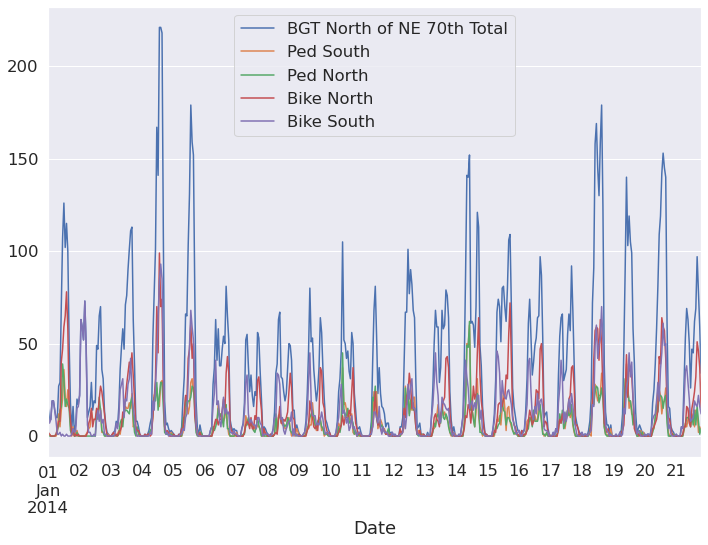

In [34]:
run.data.train_df.plot();

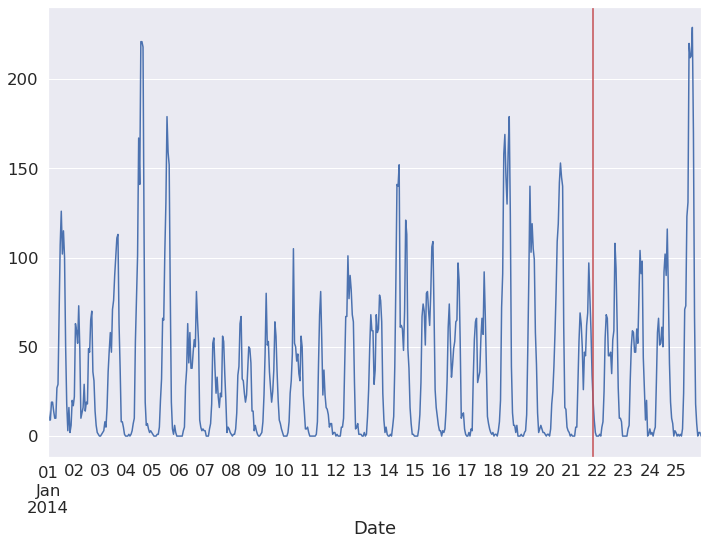

In [32]:
target = pd.concat((run.data.train_df, run.data.test_df), axis=0).iloc[:, run.data.target_index]
ax = target.plot();
ax.axvline(run.data.test_df.index[0], color='r', label='end of training');

In [31]:
true = run.data.test_df.iloc[:, run.data.target_index]

In [14]:
pred = forecasts.drop(['merlion-VAR'], axis=1)

In [16]:
# pd.concat((pred, true), 1).plot(style=['-' for _ in pred.columns] + ['-*'], linewidth=2);

In [17]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

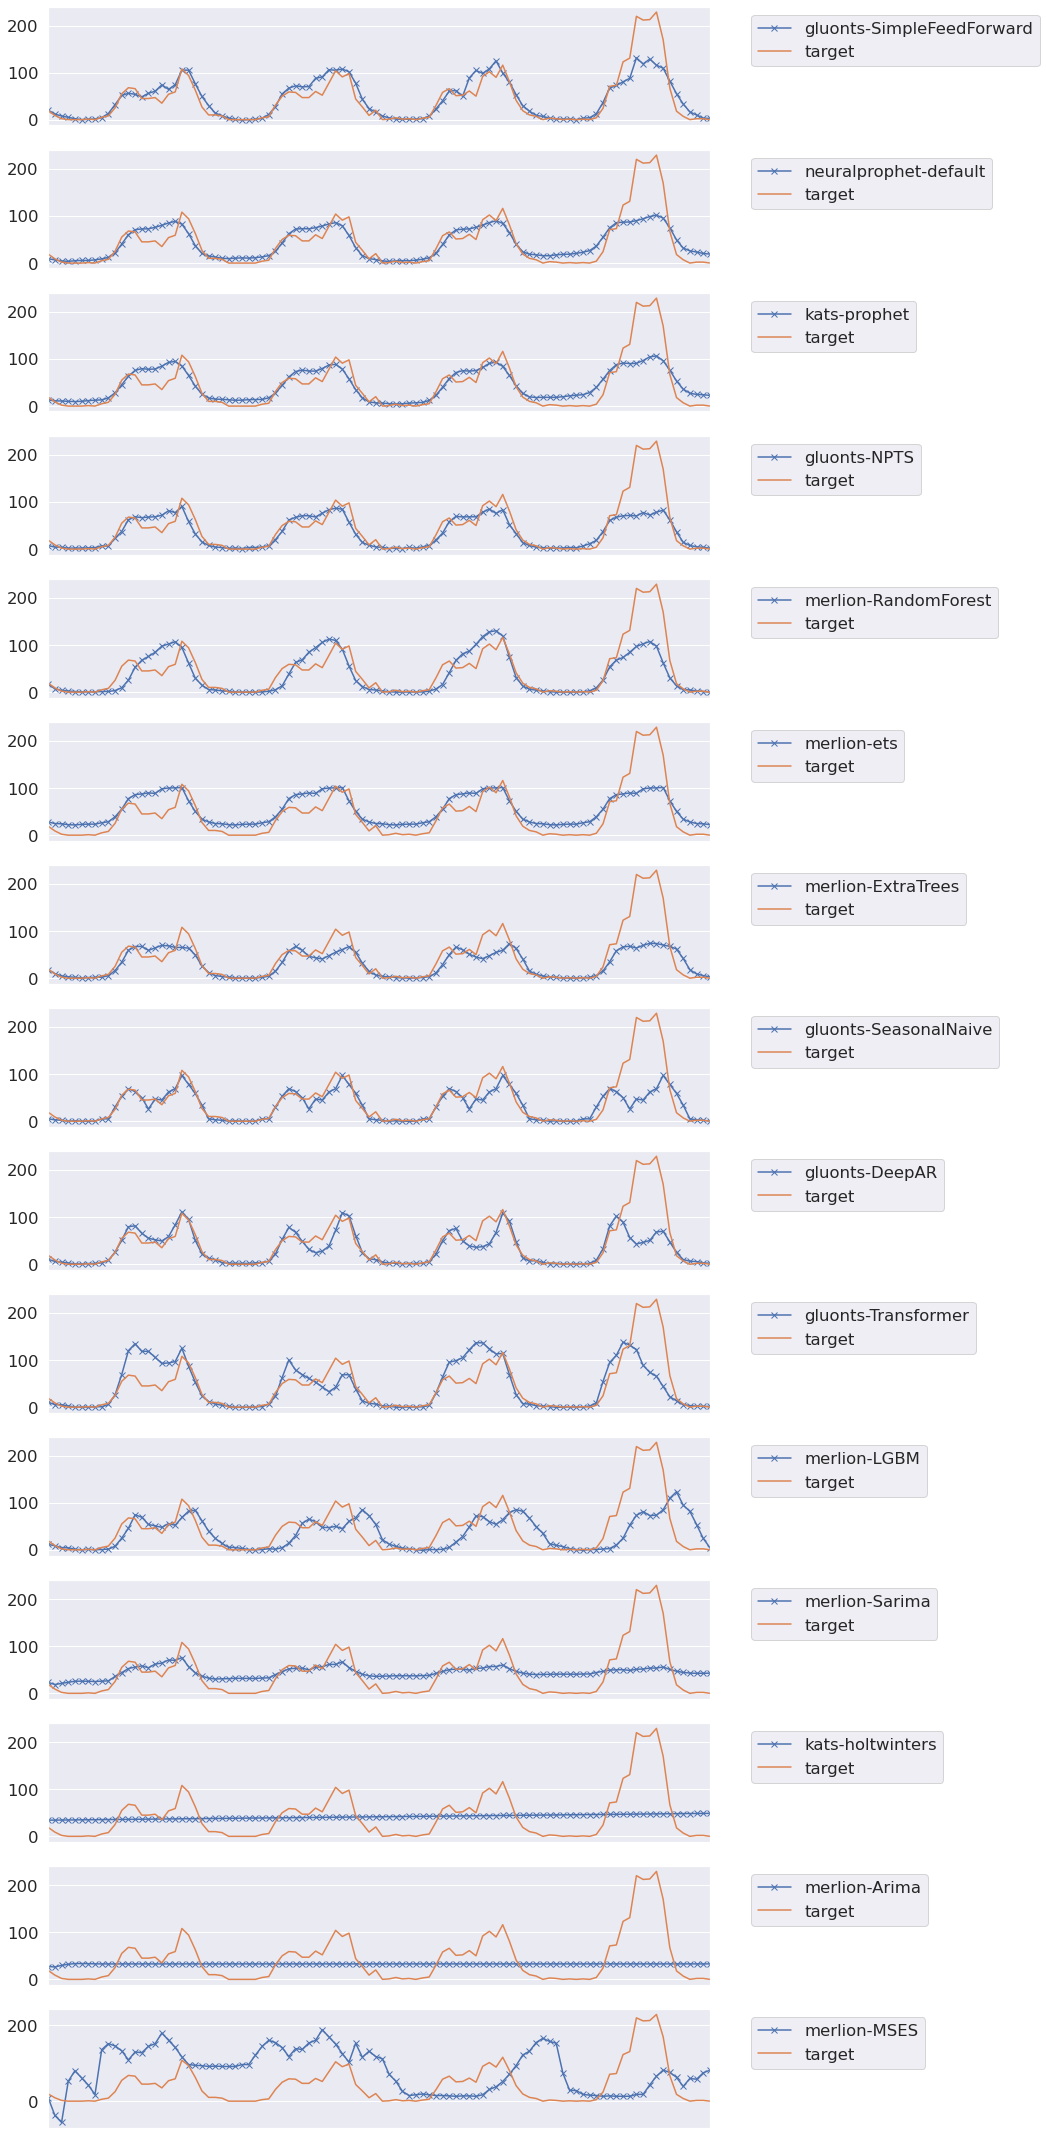

In [18]:
fig, axs = plt.subplots(pred.shape[1], 1, figsize=(15,30))

for i in range(pred.shape[1]):
    model = run.data.rmse.index[i]
    ax = pd.concat((pred.loc[:, model], true), 1).plot(ax=axs[i], legend=False, style=['-x', '-'])
    ax.get_xaxis().set_visible(False)
    ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    
plt.tight_layout()